In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
np.random.rand(200, 1)

array([[0.40383976],
       [0.66726775],
       [0.01959857],
       [0.17746626],
       [0.7620475 ],
       [0.92019001],
       [0.30444008],
       [0.9926718 ],
       [0.33102435],
       [0.58497275],
       [0.25417517],
       [0.84280566],
       [0.87769118],
       [0.34902931],
       [0.70806645],
       [0.23944236],
       [0.68222234],
       [0.70885832],
       [0.50475749],
       [0.23036378],
       [0.02701459],
       [0.49428731],
       [0.61926839],
       [0.75970398],
       [0.00228899],
       [0.63276258],
       [0.89286965],
       [0.35394903],
       [0.2161893 ],
       [0.39255118],
       [0.23960239],
       [0.51838258],
       [0.23950754],
       [0.16551301],
       [0.41516905],
       [0.5245246 ],
       [0.44520424],
       [0.28198237],
       [0.80553509],
       [0.04551412],
       [0.70262714],
       [0.73421279],
       [0.39540105],
       [0.34912731],
       [0.3008619 ],
       [0.8913578 ],
       [0.93906461],
       [0.481

In [3]:
X = 6 * np.random.rand(200, 1) - 2
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
# y = 0.5 * X + 2
# y = 0.8x^2 + 0.9x + 2

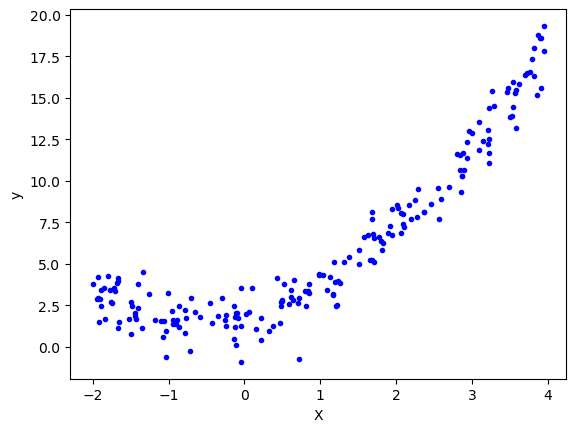

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Applying linear regression
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7920510657886719

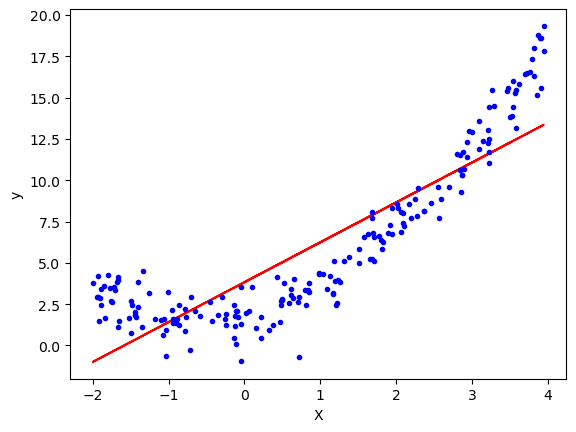

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [12]:
print(X_train[0])
print(X_train_trans[0])

[3.50498782]
[ 1.          3.50498782 12.28493959]


In [13]:
# include_bias parameter

In [14]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test_trans)

In [16]:
r2_score(y_test,y_pred)

0.9755452369291635

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.93439815 0.79366209]]
[1.92398713]


In [18]:
X_new=np.linspace(-2, 4, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

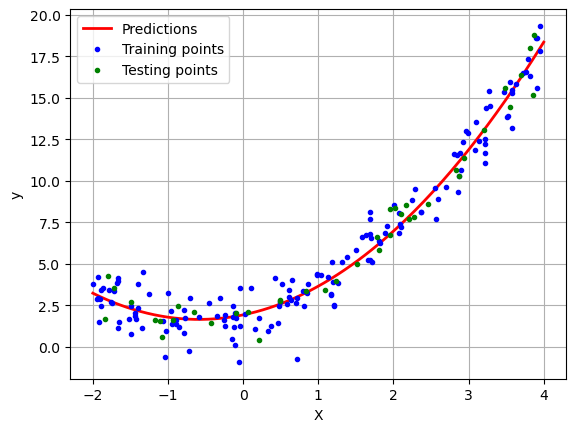

In [19]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [20]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

In [21]:
polynomial_regression(350)

C:\Users\Komal\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1120: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\Komal\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Komal\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Komal\miniconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Komal\miniconda3\Lib\site-packages\sklearn\preprocessing\_data.py:81: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [22]:
poly.powers_

array([[0],
       [1],
       [2]])

C:\Users\Komal\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


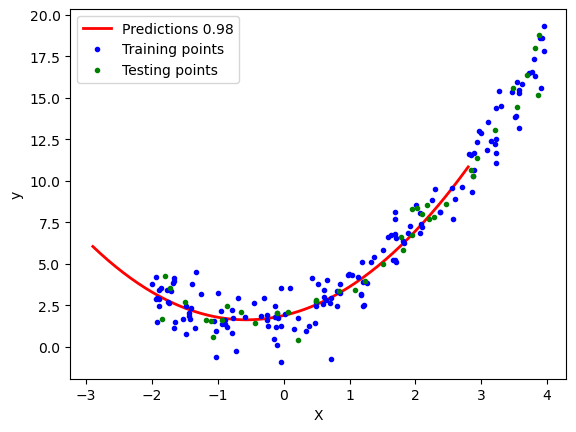

In [23]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [25]:
!pip install plotly


In [26]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [27]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [28]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [29]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [30]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [31]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [32]:
X_multi_trans.shape

(100, 496)

In [33]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [34]:
X_test_multi = poly.transform(final)

In [35]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [36]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()